# 01 player performance Notebook

This notebook implements the analysis for the 01 player performance stage of the Fantasy Football Analysis project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to path
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
# Import project modules
from src.data.data_loader import load_config, load_all_data
from src.data.data_processor import (
    standardize_team_names, 
    filter_season_data, 
    create_master_player_dataset,
    calculate_half_ppr_points,
    save_processed_data
)
from src.analysis.performance import (
    calculate_performance_metrics,
    analyze_expectation_vs_performance
)
from src.visualization.performance_vis import (
    plot_top_performers,
    plot_position_distributions,
    plot_expectation_vs_performance
)
from src.utils.validation import validate_analysis_output

# Set pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# 1. Load configuration and data
config = load_config()
data_dict = load_all_data(config)

2025-03-28 19:54:57,721 - INFO - Configuration loaded from config/config.yaml
2025-03-28 19:54:57,722 - INFO - Loading data from data/raw/F00  2024 PreSeason Rankings.csv
2025-03-28 19:54:57,726 - INFO - Loaded dataframe with shape: (217, 26)
2025-03-28 19:54:57,727 - WARNING - Missing values detected in data/raw/F00  2024 PreSeason Rankings.csv:
2025-03-28 19:54:57,727 - WARNING -   - ADP: 4 missing values
2025-03-28 19:54:57,727 - WARNING -   - PFF: 1 missing values
2025-03-28 19:54:57,728 - WARNING -   - Draft Sharks: 70 missing values
2025-03-28 19:54:57,728 - WARNING -   - 4 FOR 4: 34 missing values
2025-03-28 19:54:57,728 - WARNING -   - Ringer: 72 missing values
2025-03-28 19:54:57,728 - WARNING -   - Sharps ADP Pos Rank: 2 missing values
2025-03-28 19:54:57,729 - WARNING -   - Ranking AVG (No Sharps): 34 missing values
2025-03-28 19:54:57,729 - WARNING -   - AVG vs ADP: 36 missing values
2025-03-28 19:54:57,730 - WARNING -   - PFF Points: 1 missing values
2025-03-28 19:54:57,73

In [4]:
# 2. Process data
data_dict = standardize_team_names(data_dict)
data_dict = filter_season_data(data_dict, config['analysis']['season'])
master_df = create_master_player_dataset(data_dict)
master_df = calculate_half_ppr_points(master_df)

2025-03-28 19:54:57,825 - INFO - Team name variations across datasets:
2025-03-28 19:54:57,843 - INFO - 
preseason_rankings: ['0', 'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GNB', 'HOU', 'IND', 'JAX', 'KAN', 'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NOR', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'SFO', 'TAM', 'TEN', 'WAS']
2025-03-28 19:54:57,864 - INFO - 
season_data: ['0', 'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA', 'MIN', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS']
2025-03-28 19:54:57,864 - INFO - 
passing_data: ['ARZ', 'ATL', 'BLT', 'BUF', 'CAR', 'CHI', 'CIN', 'CLV', 'DAL', 'DEN', 'DET', 'GB', 'HST', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS']
2025-03-28 19:54:57,865 - INFO - 
line_data: ['ARZ', 'ATL', 'BLT', 'BUF', 'CAR', 'CHI', 'CIN', 'CLV', 'DAL', 'DEN', 'DET', 

In [5]:
# 3. Calculate performance metrics
performance_df = calculate_performance_metrics(master_df)

# Validate performance data
print(f"Performance dataframe shape: {performance_df.shape}")
print("\nTop 5 players by Half-PPR points:")
display(performance_df.sort_values('Half_PPR', ascending=False)[['Player', 'FantPos', 'Team', 'Half_PPR', 'Half_PPR_PPG', 'G']].head())

2025-03-28 19:54:58,026 - INFO - Calculating performance metrics
2025-03-28 19:54:58,105 - INFO - Calculating QB-specific metrics
2025-03-28 19:54:58,107 - INFO - QB metrics calculation completed
2025-03-28 19:54:58,109 - INFO - Calculating RB-specific metrics
2025-03-28 19:54:58,112 - INFO - RB metrics calculation completed
2025-03-28 19:54:58,114 - INFO - Calculating WR-specific metrics
2025-03-28 19:54:58,117 - INFO - WR metrics calculation completed
2025-03-28 19:54:58,119 - INFO - Calculating TE-specific metrics
2025-03-28 19:54:58,120 - INFO - Calculating WR-specific metrics
2025-03-28 19:54:58,123 - INFO - WR metrics calculation completed
2025-03-28 19:54:58,124 - INFO - TE metrics calculation completed
2025-03-28 19:54:58,125 - INFO - Performance metrics calculation completed


Performance dataframe shape: (629, 270)

Top 5 players by Half-PPR points:


,Player,FantPos,Team,Half_PPR,Half_PPR_PPG,G
0,Lamar Jackson,QB,BAL,428.38,25.198824,17
1,Josh Allen,QB,BUF,377.04,22.178824,17
2,Joe Burrow,QB,CIN,372.82,21.930588,17
6,Baker Mayfield,QB,TB,363.80,21.400000,17
5,Jayden Daniels,QB,WAS,349.82,20.577647,17


In [6]:
# 4. Analyze performance by position
positions = ['QB', 'RB', 'WR', 'TE']
for pos in positions:
    pos_df = performance_df[performance_df['FantPos'] == pos]
    print(f"\nTop 10 {pos}s by Half-PPR points:")
    display(pos_df.sort_values('Half_PPR', ascending=False)[['Player', 'Team', 'Half_PPR', 'Half_PPR_PPG', 'G']].head(10))


Top 10 QBs by Half-PPR points:


,Player,Team,Half_PPR,Half_PPR_PPG,G
0,Lamar Jackson,BAL,428.38,25.198824,17
1,Josh Allen,BUF,377.04,22.178824,17
2,Joe Burrow,CIN,372.82,21.930588,17
6,Baker Mayfield,TB,363.80,21.400000,17
5,Jayden Daniels,WAS,349.82,20.577647,17
13,Jared Goff,DET,321.96,18.938824,17
12,Bo Nix,DEN,316.70,18.629412,17
4,Jalen Hurts,PHI,315.12,21.008000,15
15,Sam Darnold,MIN,307.96,18.115294,17
18,Kyler Murray,ARI,295.24,17.367059,17



Top 10 RBs by Half-PPR points:


,Player,Team,Half_PPR,Half_PPR_PPG,G
9,Jahmyr Gibbs,DET,336.9,19.817647,17
3,Saquon Barkley,PHI,332.8,20.800000,16
11,Derrick Henry,BAL,326.9,19.229412,17
14,Bijan Robinson,ATL,309.2,18.188235,17
21,Josh Jacobs,GB,275.1,16.182353,17
32,De'Von Achane,MIA,260.9,15.347059,17
25,Kyren Williams,LAR,255.1,15.943750,16
26,James Cook,BUF,250.7,15.668750,16
19,Jonathan Taylor,IND,235.7,16.835714,14
20,Alvin Kamara,0,231.3,16.521429,14



Top 10 WRs by Half-PPR points:


,Player,Team,Half_PPR,Half_PPR_PPG,G
7,Ja'Marr Chase,CIN,339.50,19.970588,17
27,Justin Jefferson,MIN,265.98,15.645882,17
33,Amon-Ra St. Brown,DET,258.68,15.216471,17
49,Brian Thomas Jr.,JAX,236.50,13.911765,17
56,Drake London,ATL,230.80,13.576471,17
60,Terry McLaurin,WAS,226.80,13.341176,17
41,Malik Nabers,NYG,217.10,14.473333,15
48,CeeDee Lamb,DAL,210.90,14.060000,15
39,Mike Evans,TB,203.40,14.528571,14
78,Jaxon Smith-Njigba,SEA,203.00,11.941176,17



Top 10 TEs by Half-PPR points:


,Player,Team,Half_PPR,Half_PPR_PPG,G
75,Brock Bowers,LV,206.7,12.158824,17
62,George Kittle,SF,197.6,13.173333,15
79,Trey McBride,ARI,188.3,11.768750,16
107,Jonnu Smith,MIA,178.3,10.488235,17
123,Mark Andrews,BAL,161.3,9.488235,17
130,Travis Kelce,KC,146.9,9.181250,16
132,Sam LaPorta,DET,144.6,9.037500,16
144,Zach Ertz,WAS,140.4,8.258824,17
148,Tucker Kraft,GB,136.3,8.017647,17
155,Pat Freiermuth,PIT,135.8,7.988235,17


In [7]:
# 5. Analyze expectation vs. performance
expectation_df = analyze_expectation_vs_performance(performance_df)

2025-03-28 19:54:58,170 - INFO - Analyzing expectation vs. performance
2025-03-28 19:54:58,255 - INFO - Expectation vs. performance analysis completed


In [8]:
# Show players who significantly overperformed or underperformed
print("\nTop 10 Overperformers (based on ADP):")
display(expectation_df.sort_values('ADP_vs_Actual_Rank_Delta', ascending=False)[
    ['Player', 'FantPos', 'Team', 'ADP', 'Overall_Rank', 'ADP_vs_Actual_Rank_Delta', 'Half_PPR']
].head(10))

print("\nTop 10 Underperformers (based on ADP):")
display(expectation_df.sort_values('ADP_vs_Actual_Rank_Delta')[
    ['Player', 'FantPos', 'Team', 'ADP', 'Overall_Rank', 'ADP_vs_Actual_Rank_Delta', 'Half_PPR']
].head(10))


Top 10 Overperformers (based on ADP):


,Player,FantPos,Team,ADP,Overall_Rank,ADP_vs_Actual_Rank_Delta,Half_PPR
12,Bo Nix,QB,DEN,215.0,11.0,143.0,316.70
37,Geno Smith,QB,SEA,198.0,20.0,127.0,266.00
59,Bryce Young,QB,CAR,223.0,54.0,107.0,195.02
107,Jonnu Smith,TE,MIA,234.0,64.0,104.0,178.30
28,Russell Wilson,QB,PIT,241.0,74.0,97.0,172.78
40,Aaron Rodgers,QB,NYJ,143.0,25.0,90.0,252.58
5,Jayden Daniels,QB,WAS,112.0,5.0,86.0,349.82
66,Drake Maye,QB,0,221.0,73.0,86.0,173.14
22,Justin Herbert,QB,LAC,123.0,17.0,84.0,279.40
13,Jared Goff,QB,DET,113.0,10.0,82.0,321.96



Top 10 Underperformers (based on ADP):


,Player,FantPos,Team,ADP,Overall_Rank,ADP_vs_Actual_Rank_Delta,Half_PPR
612,Roman Wilson,WR,PIT,189.0,540.0,-399.0,0.0
340,Jonathon Brooks,RB,CAR,90.0,444.0,-372.0,6.0
519,Javon Baker,WR,0,232.0,496.0,-330.0,1.7
487,Malachi Corley,WR,NYJ,208.0,467.0,-315.0,3.7
113,Christian McCaffrey,RB,SF,1.0,278.0,-277.0,40.3
393,Keaton Mitchell,RB,BAL,233.0,442.0,-275.0,6.3
457,Ben Sinnott,TE,WAS,170.0,398.0,-270.0,11.3
427,Jermaine Burton,WR,CIN,196.0,386.0,-240.0,12.7
434,Will Shipley,RB,PHI,219.0,371.0,-214.0,13.7
361,Jaylen Wright,RB,MIA,148.0,327.0,-209.0,25.2


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/figures/top_performers_by_position.png'

<Figure size 1200x800 with 0 Axes>

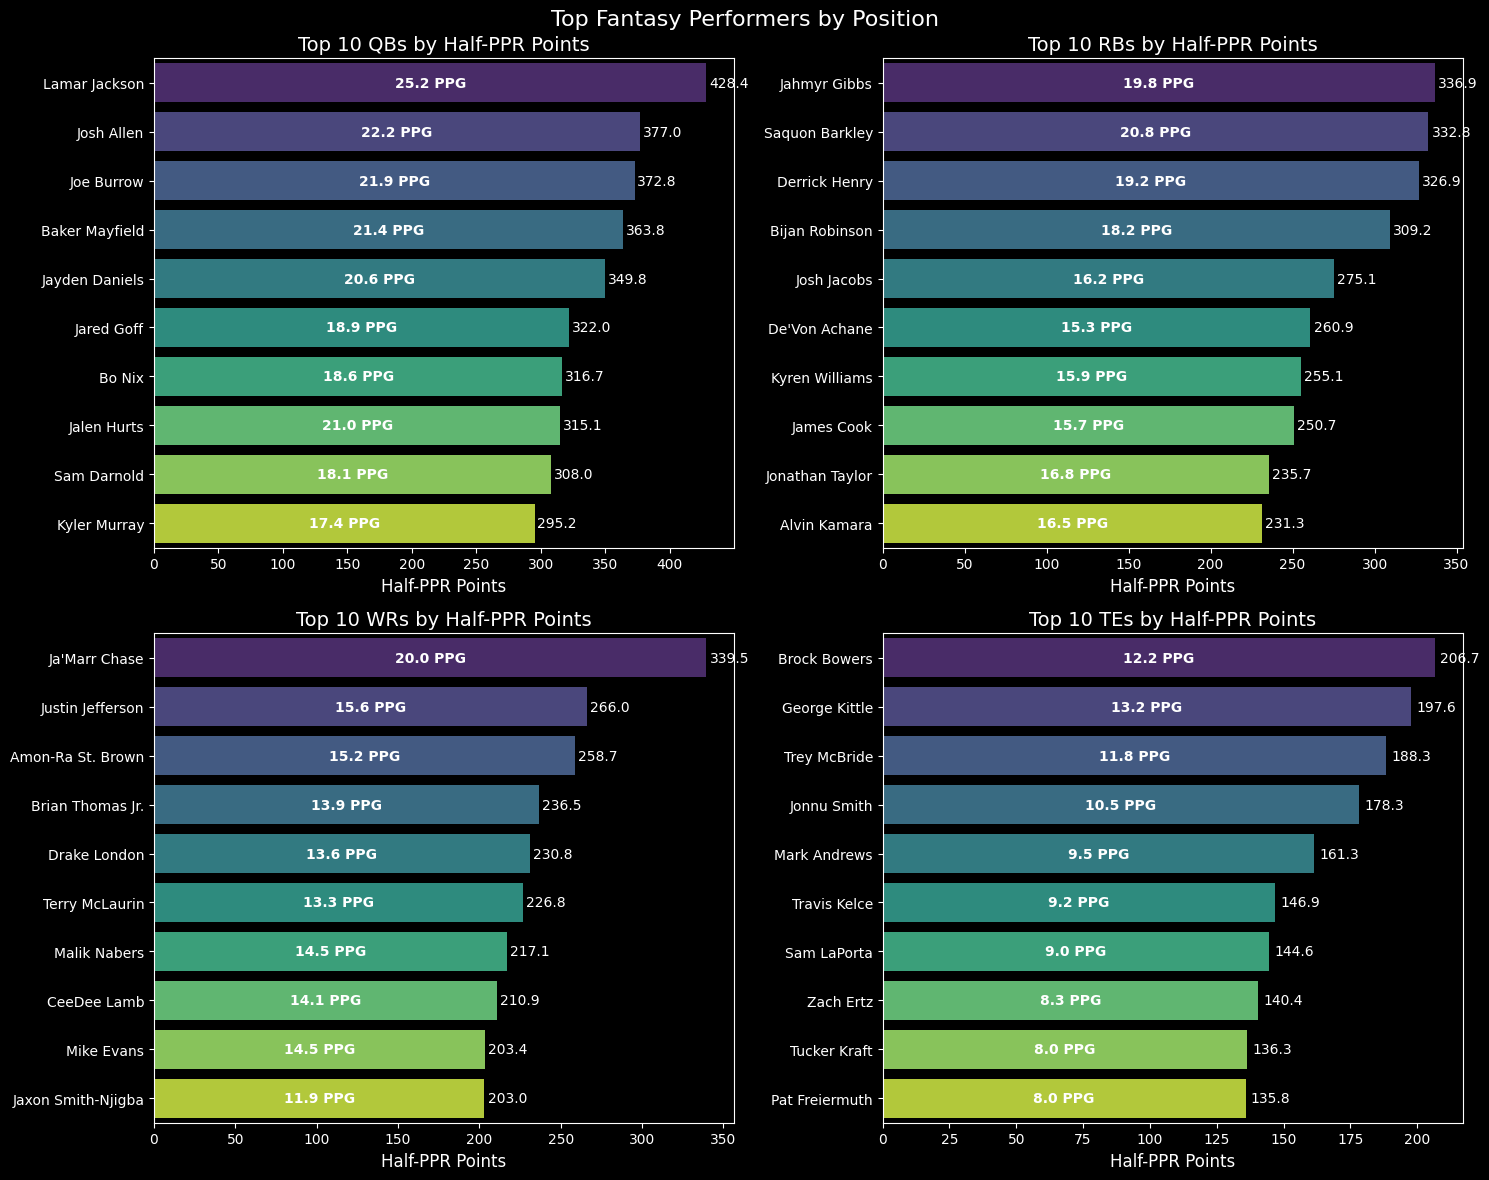

In [10]:
# 6. Create visualizations
# Top performers by position
plt.figure(figsize=(12, 8))
plot_top_performers(performance_df, n=10)
plt.tight_layout()
plt.savefig('../outputs/figures/top_performers_by_position.png')
plt.show()

# Position point distributions
plt.figure(figsize=(12, 8))
plot_position_distributions(performance_df)
plt.tight_layout()
plt.savefig('../outputs/figures/position_point_distributions.png')
plt.show()

# Expectation vs. performance
plt.figure(figsize=(12, 10))
plot_expectation_vs_performance(expectation_df)
plt.tight_layout()
plt.savefig('../outputs/figures/expectation_vs_performance.png')
plt.show()

In [ ]:
# 7. Save processed data
save_processed_data(
    performance_df, 
    'player_performance.csv', 
    config['data_paths']['processed_data']
)
save_processed_data(
    expectation_df, 
    'player_expectation_vs_performance.csv', 
    config['data_paths']['processed_data']
)

print("Player performance analysis completed!")